In [1]:
#!pip install marketing_attribution_models

In [2]:
from marketing_attribution_models import MAM

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('dataset_new.csv')

In [5]:
display(data.shape)
data.head()

(184882, 9)

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric
0,hVFl1B9VCClNRvIkpxOUfhB9P/6a832e1Dc2ZX+YGNDCah...,North Dakota,no medium,0,2023-01-21,10:33,NaN,NaN,34.0
1,KBEwoksttJ+YiA6EFk0EiR5d7LIfHYuTcD9jFLFgG/a2gr...,Maryland,no medium,0,2023-01-23,22:53,NaN,NaN,20.0
2,S27mHCNkECsdX3td8QrOEplOyacPaiMNSnSiYkrPyIq7Xe...,New Jersey,no medium,0,2023-01-24,11:39,NaN,NaN,30.0
3,1AkFYd/UnL/x3YVszCg6XQdvR0vrzdb37m809BpOSpqeZJ...,Nevada,no medium,0,2023-01-24,15:03,NaN,NaN,28.0
4,w6IqLfvEa1J/i6mHkJvoNbL4/FDZM6hFOUmj7rekuj2sXe...,West Virginia,no medium,0,2023-01-05,04:58,NaN,NaN,48.0


# General analysis with or without conversion

In [6]:
# Count the frequency of each state
frecuencia_estados = data['state_fill'].value_counts()

# Select the 10 most frequent states with our without conversions
top_10_estados = frecuencia_estados.head(10)

# Mostrar los resultados
top_10_estados

Other         45629
Kansas        15392
Texas         13961
California    11522
New York       7753
Illinois       6004
Florida        5731
Missouri       5245
Minnesota      4995
Ohio           4371
Name: state_fill, dtype: int64

In [7]:
conversion_ratio = data['conversion_flag'].mean()
print(f"Conversion Ratio: {conversion_ratio}")

Conversion Ratio: 0.0699148646163499


In [8]:
# Extract last word from each row in medium_path column
data.loc[:, 'last_medium'] = data['medium_path'].str.split(',').str[-1]

In [9]:
# Filter out people who don't convert
total_non_converted = data[data['conversion_flag'] == 0]
print("Number of people who did not convert:", total_non_converted.shape)

total_entries = len(data)
num_non_converted = len(total_non_converted)
percentage_non_converted = (num_non_converted / total_entries) * 100
print(f"Percentage of people who did not convert: {percentage_non_converted:.2f}%")


Number of people who did not convert: (171956, 10)
Percentage of people who did not convert: 93.01%


In [10]:
# Calculate the frequency of each medium in the last_medium column for non-converted individuals
non_converted_medium_frequency = total_non_converted['last_medium'].value_counts()
print(non_converted_medium_frequency)

no medium          94448
paidsocial         20960
cpc                14335
email              13603
organic            10974
affiliates          8930
referral            7687
gotoweb              947
chumba_post           58
company_profile        7
a                      3
influencer             3
affili                 1
Name: last_medium, dtype: int64


In [11]:
# Contar las ocurrencias de "no medium"
count_no_medium = data[data['medium_path'] == 'no medium'].shape[0]

# Calcular el porcentaje
percentage_no_medium = (count_no_medium / data.shape[0]) * 100

# Imprimir los resultados
print(f"Número de veces que aparece 'no medium': {count_no_medium}")
print(f"Porcentaje de 'no medium' respecto al total: {percentage_no_medium:.2f}%")


Número de veces que aparece 'no medium': 99863
Porcentaje de 'no medium' respecto al total: 54.01%


In [14]:
total_non_converted.head()

,user_pseudo_id,state_fill,medium_path,conversion_flag,first_touchpoint_date,first_touchpoint_time,conversion_date,conversion_time,state_fill_numeric,last_medium
0,hVFl1B9VCClNRvIkpxOUfhB9P/6a832e1Dc2ZX+YGNDCah...,North Dakota,no medium,0,2023-01-21,10:33,NaN,NaN,34.0,no medium
1,KBEwoksttJ+YiA6EFk0EiR5d7LIfHYuTcD9jFLFgG/a2gr...,Maryland,no medium,0,2023-01-23,22:53,NaN,NaN,20.0,no medium
2,S27mHCNkECsdX3td8QrOEplOyacPaiMNSnSiYkrPyIq7Xe...,New Jersey,no medium,0,2023-01-24,11:39,NaN,NaN,30.0,no medium
3,1AkFYd/UnL/x3YVszCg6XQdvR0vrzdb37m809BpOSpqeZJ...,Nevada,no medium,0,2023-01-24,15:03,NaN,NaN,28.0,no medium
4,w6IqLfvEa1J/i6mHkJvoNbL4/FDZM6hFOUmj7rekuj2sXe...,West Virginia,no medium,0,2023-01-05,04:58,NaN,NaN,48.0,no medium


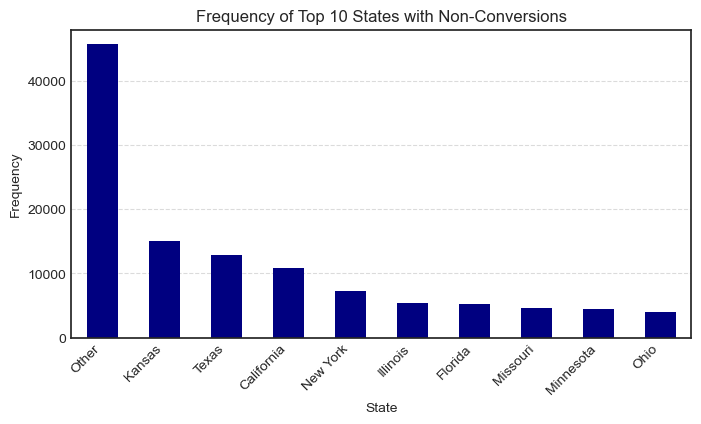

In [21]:
# Filter the DataFrame to consider only the top 10 most frequent states
top_10_states = total_non_converted['state_fill'].value_counts().head(10)
top_10_states_data = total_non_converted[total_non_converted['state_fill'].isin(top_10_states.index)]
state_frequency = top_10_states_data['state_fill'].value_counts()

plt.figure(figsize=(8, 4))
state_frequency.plot(kind='bar', color='navy')
plt.title('Frequency of Top 10 States with Non-Conversions')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


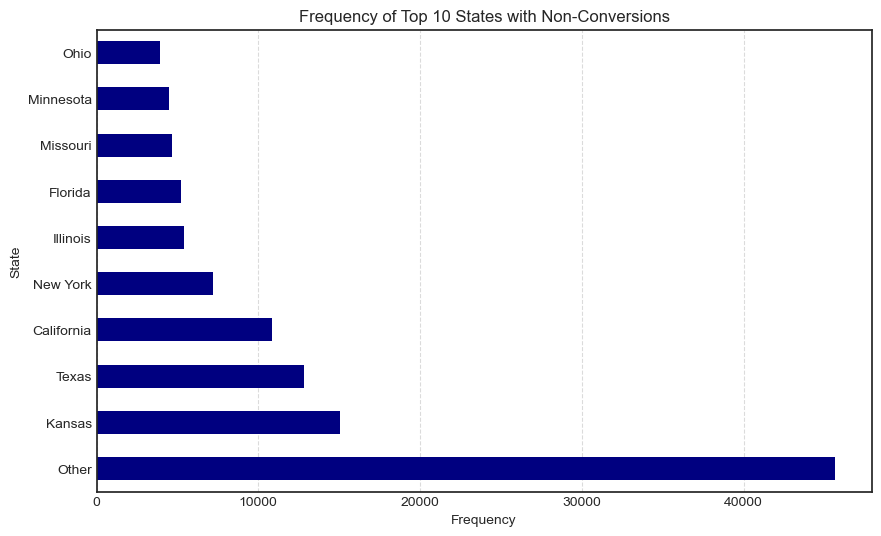

In [18]:
import matplotlib.pyplot as plt

# Filter the DataFrame to consider only the top 10 most frequent states
top_10_states = total_non_converted['state_fill'].value_counts().head(10)
top_10_states_data = total_non_converted[total_non_converted['state_fill'].isin(top_10_states.index)]

# Calculate the sum of frequency of states
state_frequency = top_10_states_data['state_fill'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
state_frequency.plot(kind='barh', color='navy')  # Set kind='barh' for horizontal bars
plt.title('Frequency of Top 10 States with Non-Conversions')
plt.xlabel('Frequency')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adjust grid to x-axis
plt.show()


# Analysis of channels and conversions

In [ ]:
# Filter only by conversions obtained
conversion_data = data[data['conversion_flag'] == 1]

In [ ]:
conversion_data.head()
conversion_data.shape

In [ ]:
# Calculate the average number of days that pass between the first contact and the conversion

conversion_data['first_touchpoint_date'] = pd.to_datetime(conversion_data['first_touchpoint_date'])
conversion_data['conversion_date'] = pd.to_datetime(conversion_data['conversion_date'])
conversion_data['days_to_conversion'] = (conversion_data['conversion_date'] - conversion_data['first_touchpoint_date']).dt.days
average_days_to_conversion = conversion_data['days_to_conversion'].mean()
print(f"Average days to conversion: {average_days_to_conversion:.2f} days")


In [ ]:
conversion_data['day_of_week'] = conversion_data['conversion_date'].dt.day_name()
conversion_by_day = conversion_data['day_of_week'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
conversion_by_day.plot(kind='bar', color='navy')
plt.title('Conversions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Conversions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#for i in range(len(conversion_by_day)):
  #  plt.text(i, conversion_by_day[i] - 80, conversion_by_day[i], ha='center', color='white')
plt.show()


In [ ]:
# Frequency of last channel in contact before conversion
conversion_data['last_medium'].value_counts()

In [ ]:
ratio = 5415 / 2325
print(f'The frequency of "no medium" is approximately {ratio:.2f} times greater than the frequency of "organic".')

In [ ]:
# Identify the top 10 states with conversions

conv_state_frequency = conversion_data['state_fill'].value_counts()
top_10_states_conv = conv_state_frequency.head(10)
top_10_states_conv

In [ ]:
# Calculate the conversion percentage for each state

conversion_percentage_by_state = (top_10_states_conv / 12926) * 100
conversion_percentage_by_state

In [ ]:
# I want to know the average in Texas states with the highest conversions

texas_data = conversion_data[conversion_data['state_fill'] == 'Texas']
frecuencia_medium_texas = texas_data['last_medium'].value_counts()
print(frecuencia_medium_texas)


In [ ]:
# Search if there is a correlation between the top 10 states with the highest conversions and the channels

top_10_estados = conversion_data['state_fill'].value_counts().head(10).index.tolist()
top_10_data = conversion_data[conversion_data['state_fill'].isin(top_10_estados)]
top_10_data = top_10_data[top_10_data['last_medium'] != 'no medium']
contingency_table = pd.crosstab(top_10_data['state_fill'], top_10_data['last_medium'])

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Relationship between the top 10 states with the channels')
plt.xlabel('Conversion channels')
plt.ylabel('State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Calculate the conversion rate for each state in the top 10 that convert the least

conversions_by_state = conversion_data.groupby('state_fill')['conversion_flag'].sum()
conversions_by_state_asc = conversions_by_state.sort_values(ascending=True)
top_10_states_menos_conv = conversions_by_state_asc.head(10)
porcentaje_conversions_by_state_menos_conv = (top_10_states_menos_conv / 12926) * 100
print(porcentaje_conversions_by_state_menos_conv)


In [ ]:
def custom_attribution_model(data):
    num_touchpoints = len(data)
    first_touchpoint_credit = 30
    last_touchpoint_credit = 40
    intermediate_touchpoint_credit = (100 - first_touchpoint_credit - last_touchpoint_credit) / (num_touchpoints - 2)

    attribution_credits = []

    attribution_credits.append(first_touchpoint_credit)
    for i in range(1, num_touchpoints - 1):
        attribution_credits.append(intermediate_touchpoint_credit)
    attribution_credits.append(last_touchpoint_credit)

    data['attribution_credit'] = attribution_credits
    return data

custom_attributions = custom_attribution_model(conversion_data)
custom_attributions

In [ ]:
# Apply filter to select only rows where 'last_medium' is different from 'no medium'
filtered_custom_attributions = custom_attributions[custom_attributions['last_medium'] != 'no medium']

In [ ]:
# Select the rows with the 10 highest values in the "attribution_credit" column

top_10_custom_attributions = filtered_custom_attributions.nlargest(10, 'attribution_credit')
filtered_df = top_10_custom_attributions[['state_fill', 'conversion_date','last_medium','attribution_credit']]
filtered_df

In [ ]:
top_50_custom_attributions = filtered_custom_attributions.nlargest(50, 'attribution_credit')
filtered_df_50 = top_50_custom_attributions[['state_fill', 'conversion_date','last_medium','attribution_credit']]
#filtered_df_50

In [ ]:
#Split the "medium_path" by channel in the journey

medium_path_split = conversion_data['medium_path'].str.split(',', expand=True)
medium_path_split.columns = [f"mp_{i+1}" for i in range(len(medium_path_split.columns))]
df = pd.concat([conversion_data, medium_path_split], axis=1)
df

In [ ]:
# Filter only by conversions obtained
df_m = df.loc[df['medium_path'] != 'no medium'].copy()

In [ ]:
# Count the number of steps they took to convert
df_m['journey_steps'] = df_m.filter(like='mp').count(axis=1)
df_m

In [ ]:
#df_m['journey_steps'].value_counts()

In [ ]:
# Calculate the frequency of steps from 1 to 10
frequency_steps_1_to_10 = [(df_m['journey_steps'] == i).sum() for i in range(1, 11)]
total_steps = sum(frequency_steps_1_to_10)
step_table = pd.DataFrame({
    'Step': list(range(1, 11)),
    'Frequency': frequency_steps_1_to_10
})

step_table.loc['Total'] = ['Total', total_steps]
step_table

* Analyze first touchpoint channels

In [ ]:
# Calculate the frequency of each medium in 'mp_1'

frequency_mp_1 = df_m['mp_1'].value_counts()
mp_1_table = pd.DataFrame({'Medium': frequency_mp_1.index, 'Frequency': frequency_mp_1.values})
mp_1_table

* Most frequent channel in the last touchpoint before conversion

In [ ]:
# Calculate the frequency of each medium in 'last_medium'
frequency_last_mp = df_m['last_medium'].value_counts()
last_mp_table = pd.DataFrame({'Medium': frequency_last_mp.index, 'Frequency': frequency_last_mp.values})
last_mp_table

In [ ]:
# Find out how many people repeat the conversion by which channel

duplicados_por_canal = df[df.duplicated(subset=['user_pseudo_id', 'last_medium'], keep=False)]
duplicados_por_canal = duplicados_por_canal.groupby('last_medium')['user_pseudo_id'].count().reset_index()
duplicados_por_canal.rename(columns={'user_pseudo_id': 'duplicates_count'}, inplace=True)
duplicados_por_canal = duplicados_por_canal.sort_values(by='duplicates_count', ascending=False)
duplicados_por_canal


In [ ]:
# Find out how many people repeat the conversion by which channel
duplicados_por_user = df[df.duplicated(subset=['user_pseudo_id', 'last_medium'], keep=False)]
duplicados_por_user = duplicados_por_user.groupby(['user_pseudo_id', 'last_medium']).size().reset_index(name='duplicates_count')
duplicados_por_user_top10 = duplicados_por_user.sort_values(by='duplicates_count', ascending=False).head(10)
duplicados_por_user_top10

In [ ]:
# Calculate the maximum number of steps, the minimum and the average

max_journey_steps = df_m['journey_steps'].max()
min_journey_steps = df_m['journey_steps'].min()
avg_journey_steps = df_m['journey_steps'].mean()
summary_df = pd.DataFrame({
    'Statistic': ['Maximum', 'Minimum', 'Average'],
    'Journey Steps': [max_journey_steps, min_journey_steps, avg_journey_steps]
})

print(summary_df)


In [ ]:
# the total frequency with which the channel is repeated in journeys

mediums_concatenados = pd.concat([df_m[f'mp_{i}'] for i in range(1, 75)])
frecuencia_medios = mediums_concatenados.value_counts()
tabla_frecuencia = pd.DataFrame(frecuencia_medios, columns=['Frequency'])
print(tabla_frecuencia)

In [ ]:
# Group journey_steps into categories
df_m['journey_steps_group'] = pd.cut(df_m['journey_steps'], bins=[0, 1, 5, 10, float('inf')], labels=['1 step', '2-5 steps', '6-10 steps', 'more than 10 steps'])

journey_steps_group_freq = df_m['journey_steps_group'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
journey_steps_group_freq.plot(kind='bar', color='navy')
plt.xlabel('Number of Journey Steps')
plt.ylabel('Frequency')
plt.title('Frequency of Journey Steps Groups')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Which channel is the most frequent for those who only take one step in the conversion?

df_1_step = df_m[df_m['journey_steps'] == 1]
frequency_last_medium = df_1_step['last_medium'].value_counts()
frequency_last_medium

In [ ]:
medium_counts = df_m['mp_1'].value_counts()

labels = medium_counts.index
sizes = medium_counts.values

colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, colors=colors, startangle=140, autopct='%1.1f%%', pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
legend_labels = [f'{label}: {sizes[i]}' for i, label in enumerate(labels)]
ax.legend(wedges, legend_labels, loc='center right', bbox_to_anchor=(-0.1, 0.5))
for autotext in autotexts:
    autotext.set_color('white')

plt.title('Distribution of Mediums in mp_1')
plt.show()


In [ ]:
df_m['mp_1'].value_counts()

In [ ]:
df_m['last_medium'].value_counts()

In [ ]:
# What combination of start and end channels has the highest frequency?

df_m['start_end_medium'] = df_m['mp_1'] + '_' + df_m['last_medium']
frecuencia_combinaciones = df_m['start_end_medium'].value_counts()
combinacion_mas_frecuente = frecuencia_combinaciones.idxmax()
frecuencia_mas_frecuente = frecuencia_combinaciones.max()
print(f"Most frequent combination of mediums at start and end: {combinacion_mas_frecuente}")
print(f"Frequency: {frecuencia_mas_frecuente}")


In [ ]:
df_m['conversion_date'] = pd.to_datetime(df_m['conversion_date'])

# Agregar una nueva columna 'day_week' que contenga el nombre del día de la semana
df_m['day_week'] = df_m['conversion_date'].dt.day_name()

# Mostrar el DataFrame con la nueva columna
df_m.head()

In [ ]:
# Know the most frequent initial and final channel combination excluding 1-step journeys

filtered_df = df_m[df_m['journey_steps'] != 1]
start_end_medium_counts = filtered_df.groupby(['start_end_medium']).size().reset_index(name='count')
start_end_medium_counts = start_end_medium_counts.sort_values(by='count', ascending=False)
start_end_medium_counts.head()

In [ ]:
#df_m.to_csv('dataset_by_channel.csv', index=False)
df_m.to_excel('dataset_by_channel_excel.xlsx', index=False)

In [ ]:
conversion_data['conversion_time_2'] = pd.to_datetime(conversion_data['conversion_time'])
conversion_by_hour = conversion_data['conversion_time_2'].dt.hour.value_counts().sort_index()
print("Conversion counts by hour:")
print(conversion_by_hour)

In [ ]:
plt.figure(figsize=(5, 8))
conversion_by_hour.plot(kind='barh', color='navy')
plt.title('Conversion Counts by Hour')
plt.xlabel('Number of Conversions')
plt.ylabel('Hour of the Day')
plt.yticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

